<h1 style="text-align:right">Will Dodge 2018-05-05</h1>

<div style="padding:30px 20px 30px 20px;background-color:#e8ffe8;border:px ridge black;"><p style="font-weight:bold;font-size:2.25vw;text-align:center;
padding:0px 0px 30px 0px;"><i>Yield and Phenology Model for Corn</i></p>
<p style="font-size:1vw;text-align:center;">Will Dodge Spring 2018</p></div>

<div style="padding:30px 20px 30px 18px;background-color:#e8ffe8;">
 <p style="font-weight:bold;font-size:1.5vw;text-align:left;">Overview</p>
 <p style="font-size:1.25vw;text-align:left;line-height:1.5;text-indent:50px;padding:40px 40px 3px 40px;margin:0px;">   
Agricultural producers must respond to environmental changes during production in order to maximize profits. The production environment changes both annually and perennially. Farmers must deal with seasonal weather variability as well as long-term climate variability. One important way to mitigate risk associated with environmental variability is to have a reasonable means to estimate crop growth and development. Producers can predict the demands and outputs of cropping systems with growth models, and by doing so, are able to reduce risk associated with production. Specifically, in rain-fed environments. The focus of this report is to model leaf area index, above ground plant matter, maturity, and yield in corn.
 </p>   
</div>

<div style="padding:30px 20px 30px 18px;background-color:#e8ffe8;">
    <p style="font-weight:bold;font-size:1.5vw;text-align:left;">Method</p>
    <p style="font-size:1.25vw;text-align:left;line-height:1.5;text-indent:50px;padding:40px 40px 3px 40px;margin:0px;">   
In corn maturity, or growth stage, is evaluated based on the number of leaves that have emerged during vegetative growth and on kernel development during maturity. The best method for predicting growth stages in corn is by calculating a running total of growing degree units (GDU). The GDU values used for given stages of maturity in this model were extracted from an excellent publication by the Chad Lee at the University of Kentucky.<a href="https://drive.google.com/file/d/1s_tptQoZMGGW79mWLPSqC-u1VzSQW44h/view?usp=sharing">(Lee, 2011)</a>.
    </p>
    <p style="font-size:1.25vw;text-align:left;line-height:1.5;text-indent:50px;padding:3px 40px 3px 40px;margin:0px;">    
GDUs are easy to calculate and implement in predictive modeling. To calculate total above ground biomass and LAI is a little more challenging. The method used to estimate LAI and above ground dry mass are based on the described by <a href="https://drive.google.com/file/d/1hWFDn959qMfdB-65VQy5vKF_00A1UJIu/view?usp=sharing">(Mass, 1993)</a> in the paper <i>Parameterized Model of Gramineous Crop Growth: I. Leaf Area and Dry Mass Simulation</i>. The method uses growing degree days, total daily solar radiation, and a handful of empirical parameters to model growth. The process itself is recursive in that as the LAI increase so does the quantity of intercepted light and, in return, the LAI increases even more. This occurs until the LAI reaches a maximum potential that is limited by the parameters that are used in its calculation.  
    </p>
    <p style="font-size:1.25vw;text-align:left;line-height:1.5;text-indent:50px;padding:3px 40px 3px 40px;margin:0px;">   
The model is based a significant amount of prior experimentation. In order to generate many of the parameters used in Maas’s model extensive data must be collected in order to establish the values of the parameters themselves. Fortunately, this work has been done and it is now a straight-forward process to apply the model and estimate LAI and above ground dry matter. The Python code below executes the model and visualizes a portion of the data.
    </p>    
</div>

<h1 style="padding:20px;background-color:#e8ffe8;text-align:left">Import and clean data:</h1>

In [1]:
from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Markdown, display, HTML
import pandas as pd
import numpy as np

In [2]:
DF = pd.read_csv("https://drive.google.com/uc?id=1K7vnCpK8tElmE-VfyMiN4pQSQEAkOrTE") # bushland data set W. Guo Spring 2018

In [3]:
def put_colon_in_time(x):
        x = str(x)
        if len(x) == 0:
            pass
        elif len(x) == 1:
            x = "00:0" + x
        elif len(x) == 2:
            x = "00:" + x
        elif len(x) == 3:
            x = "0" + x[0] + ":" + x[1] + x[2]
        else:
            x = x[0] + x[1] + ":" + x[2] + x[3]
        return x

In [4]:
def TimeNO24(x):
        if x == "24:00":
            x = "23:59"
        else:
            x = x
        return x

In [5]:
DF = pd.read_csv("https://drive.google.com/uc?id=1K7vnCpK8tElmE-VfyMiN4pQSQEAkOrTE") # bushland data set W. Guo Spring 2018

DF["TimeWcolon"] = DF["Time"].map(put_colon_in_time)

DF["TimeNo24"] = DF["TimeWcolon"].map(TimeNO24)

DF["date"] = DF["Year"].map(str)+"-"+DF['DOY'].map(str)+" "+ DF["TimeNo24"].map(str) 

DF["date"] = pd.to_datetime(DF["date"], format = "%Y-%j %H:%M")

DF.set_index(DF["date"], inplace = True)

DF = DF.drop(columns=["date","TimeWcolon","TimeNo24"])

DF["AirTemp"] = DF["AirTemp"][(DF["AirTemp"] < 45) & (DF["AirTemp"] > -30)]

DF["RelHumid"] = DF["RelHumid"][(DF["RelHumid"] < 100) & (DF["RelHumid"] > 0)]

DF["SolRad"] = DF["SolRad"][(DF["SolRad"] < 2000) & (DF["SolRad"] > 0)]

DF["WS_2m"] = DF["WS_2m"][(DF["WS_2m"] < 18) & (DF["WS_2m"] > 0)]

DF["BP"] = DF["BP"][(DF["BP"] < 120) & (DF["BP"] > 0)]

DF["Rainfall_Tot"] = DF["Rainfall_Tot"][(DF["Rainfall_Tot"] < 200) & (DF["Rainfall_Tot"] > 0)]

DF["AirTemp"] = DF["AirTemp"].interpolate()

DF["RelHumid"] = DF["RelHumid"].interpolate()

DF["SolRad"] = DF["SolRad"].interpolate()

DF["WS_2m"] = DF["WS_2m"].interpolate()

DF["BP"] = DF["BP"].interpolate()

DF["Rainfall_Tot"] = DF["Rainfall_Tot"].fillna(0)

DF_daily = DF.resample('24H').mean()

DF_daily["Rain_Tot"] = DF.loc[:,("Rainfall_Tot")].resample('24H').sum()

DF_daily["mint.C"] = DF.groupby('DOY').min()["AirTemp"].values

DF_daily["maxt.C"] = DF.groupby('DOY').max()["AirTemp"].values

DF_daily["min.RH.%"] = DF.groupby('DOY').min()["RelHumid"].values

DF_daily["max.RH.%"] = DF.groupby('DOY').max()["RelHumid"].values

DF_daily["radn.daily.sum.W/m2"] = DF.groupby('DOY').sum()["SolRad"].values

DF_daily["AirTemp.F"] = (DF_daily["AirTemp"]*1.8) + 32

DF_daily["maxt.F"] = (DF_daily["maxt.C"]*1.8) + 32

DF_daily["mint.F"] = (DF_daily["mint.C"]*1.8) + 32

<h1 style="padding:20px;background-color:#e8ffe8;text-align:left">Calculate GDU for both °F and °C:</h1>

<div style="padding:20px;background-color:#e8ffe8">
    <p style="text-align:left;font-size:1.25vw;font-weight:550;line-height:1.6;text-indent:50px">In the process of developing Python code to run this model a realization about growing degrees occurred. We discovered that the product of a GDU calculation cannot be directly converted from °F to °C and vice versa. This is because there in not relationship to absolute temperature, only the degrees themselves. To convert between GDU in °F to °C divide by 1.8 but <b>do not subtract 32</b> as one might do in a typical degree conversion. Understanding the way these two forms of GDU relate to the other will certainly prevent any confusion moving forward</p>
 </div>  

In [6]:
DF_daily["GDU.C"] = (DF_daily["mint.C"]+DF_daily["maxt.C"])/2 - 10

In [7]:
DF_daily[(DF_daily["GDU.C"] < 0)] = 0

In [8]:
DF_daily["GDU.F"] = (DF_daily["mint.F"]+DF_daily["maxt.F"])/2 - 50

In [9]:
DF_daily[(DF_daily["GDU.F"] < 0)] = 0

In [10]:
DF_daily["GDU.C"][100:105]

date
2016-04-10    7.793575
2016-04-11    0.000000
2016-04-12    0.000000
2016-04-13    4.471442
2016-04-14    5.377064
Freq: 24H, Name: GDU.C, dtype: float64

In [11]:
DF_daily["GDU.F"][100:105] / 1.8

date
2016-04-10    7.793575
2016-04-11    0.000000
2016-04-12    0.000000
2016-04-13    4.471442
2016-04-14    5.377064
Freq: 24H, Name: GDU.F, dtype: float64

<div style="padding:20px;background-color:#e8ffe8">
    <p style="text-align:left;font-size:1.25vw;font-weight:550;line-height:1.6">This test shows that the using 1.8 as a conversion between independently claculated GDU returns <code>True</code>.</p>
 </div>  

In [12]:
np.round(DF_daily["GDU.C"][:27].values,3) == np.round((DF_daily["GDU.F"][:27].values / 1.8),3) # conversion is 1.8

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

<h1 style="padding:20px;background-color:#e8ffe8;text-align:left">Create a data set that for the growing season only:</h1>

In [13]:
DF_season = DF_daily.loc["2016-05-22":"2016-12-31", list(DF_daily)]

In [14]:
DF_season["accu_GDU.C"] = DF_season["GDU.C"].cumsum()

In [15]:
DF_season["accu_GDU.F"] = DF_season["GDU.F"].cumsum()

<h1 style="padding:20px;background-color:#e8ffe8;text-align:left">Create dictionary of growth stage thresholds:</h1>

In [16]:
cutoffs = {'V2':200,'V6':475,'V12':870,'VT':1250,'R1':1400,'phys_maturity':1583.5,'R6':2700}

<h1 style="padding:20px;background-color:#e8ffe8;text-align:left">Return dates when corn reaches each growth stage:</h1>

In [17]:
def predict_growth_stages(cutoffs, gdu_series, dataset): #function will output predicted values to html side   
    def printmd(string):
        display(Markdown(string))
    htm_out = """<div style="padding:20px;background-color:#e8ffe8"><h1>Growth Stage Predicted Dates:</h1>"""
    for growth_stage, value in cutoffs.items():
        for idx,i in enumerate(gdu_series):
            if i >= value:
                htm_out +="""<p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 10px 10px 0px 10px;">
                <code>""" + str(growth_stage) + """</code> growth stage threshold reached on:  <code>""" + str(dataset.index[idx]) + """</code></p>"""
                break
            if idx+1 == len(DF_season["accu_GDU.C"]):
                htm_out +="""<p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 10px 10px 0px 10px;">
                Threshold for <code>""" + str(growth_stage) + """</code> not reached</p>"""
                break

    printmd(htm_out+"""</div>""")
    
predict_growth_stages(cutoffs, DF_season["accu_GDU.F"], DF_season)

<div style="padding:20px;background-color:#e8ffe8"><h1>Growth Stage Predicted Dates:</h1><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 10px 10px 0px 10px;">
                <code>phys_maturity</code> growth stage threshold reached on:  <code>2016-07-18 00:00:00</code></p><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 10px 10px 0px 10px;">
                <code>V2</code> growth stage threshold reached on:  <code>2016-06-01 00:00:00</code></p><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 10px 10px 0px 10px;">
                <code>V12</code> growth stage threshold reached on:  <code>2016-06-26 00:00:00</code></p><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 10px 10px 0px 10px;">
                <code>R6</code> growth stage threshold reached on:  <code>2016-08-27 00:00:00</code></p><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 10px 10px 0px 10px;">
                <code>V6</code> growth stage threshold reached on:  <code>2016-06-13 00:00:00</code></p><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 10px 10px 0px 10px;">
                <code>VT</code> growth stage threshold reached on:  <code>2016-07-08 00:00:00</code></p><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 10px 10px 0px 10px;">
                <code>R1</code> growth stage threshold reached on:  <code>2016-07-12 00:00:00</code></p></div>

<h1 style="padding:20px;background-color:#e8ffe8;text-align:left">Calculate LAI and above-ground dry matter:</h1>

In [18]:
DF_season["radn.daily.sum.MJ"] = DF_season["radn.daily.sum.W/m2"] * 0.0864 # convert daily solar to MJ

In [19]:
par_fraction = 0.45
day_one_LAI = 0.00167
light_extinction_coefficient = 0.35
light_use_efficiency = 3.5
a = 0.0396
b = 0.00417
c = 21
d = 1.23
specific_leaf_area = 0.024

In [20]:
q_list = []
delta_M_list = []
p_list = []
delta_L_list = []
J_list = []

for accu_GDU, radn_daily_total in zip(DF_season["accu_GDU.C"],DF_season["radn.daily.sum.MJ"]):
    q= par_fraction * radn_daily_total * (1 - np.exp(-(light_extinction_coefficient) * day_one_LAI))
    delta_M = light_use_efficiency * q
    p = (1 - (a*np.exp(b*accu_GDU)))
    if p < 0:
        p = 0
    delta_L = delta_M * p * specific_leaf_area
    J = c + d * accu_GDU
    q_list.append(q)
    delta_M_list.append(delta_M)
    p_list.append(p)
    delta_L_list.append(delta_L)
    J_list.append(J)

In [21]:
DF_season["Q"] = q_list
DF_season["delta_M"] = delta_M_list
DF_season["total.dry.matter"] = DF_season["delta_M"].cumsum()
DF_season["P"] = p_list
DF_season["delta_L"] = delta_L_list
DF_season["LAI"] = DF_season["delta_L"].cumsum()
DF_season["J"] = J_list

<h1 style="padding:20px;background-color:#e8ffe8;text-align:left">Plot LAI, total dry matter accumulation:</h1>

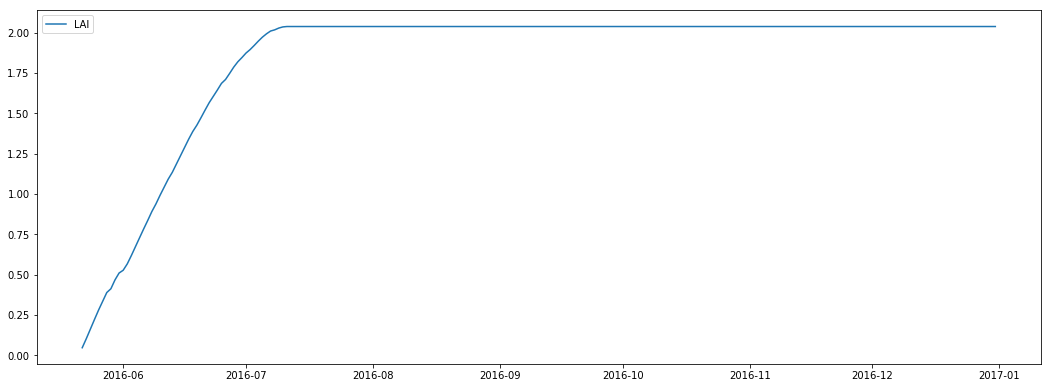

In [22]:
d = {"LAI":DF_season["LAI"]}
DF_plot = pd.DataFrame(d) 
cols = list(DF_plot)
plt.figure(figsize=(18,6.5))
for i in cols:
    plt.plot(DF_plot[i])
plt.legend(loc='upper left')

Text(0.5,1,'Accumulation of above ground dry mater over time in corn')

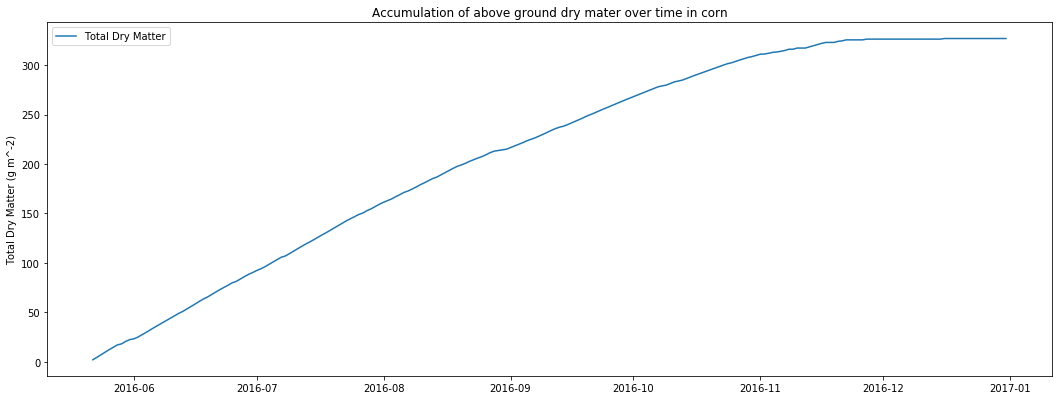

In [23]:
d = {"Total Dry Matter":DF_season["total.dry.matter"]}
DF_plot = pd.DataFrame(d) 
cols = list(DF_plot)
plt.figure(figsize=(18,6.5))
for i in cols:
    plt.plot(DF_plot[i])
plt.legend(loc='upper left')
plt.ylabel("Total Dry Matter (g m^-2)")
plt.title("Accumulation of above ground dry mater over time in corn")

([], <a list of 0 Text yticklabel objects>)

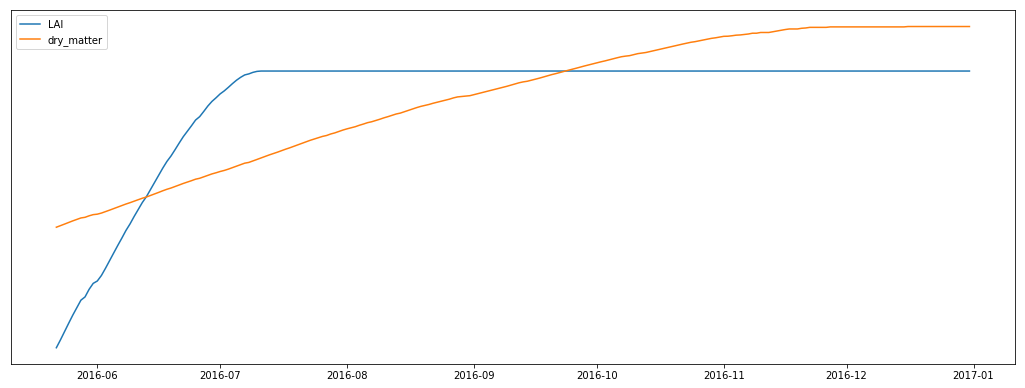

In [24]:
DF_season_LAI_scaled = (DF_season["LAI"] - DF_season["LAI"].mean() ) / DF_season["LAI"].std()
DF_season_total_DM = (DF_season["total.dry.matter"] - DF_season["total.dry.matter"].mean() ) / DF_season["total.dry.matter"].std()
d = {"LAI":DF_season_LAI_scaled,"dry_matter":DF_season_total_DM}
DF_plot = pd.DataFrame(d) 
cols = list(DF_plot)
plt.figure(figsize=(18,6.5))
for i in cols:
    plt.plot(DF_plot[i])
plt.legend(loc='upper left')
plt.yticks([])

<div style="padding:30px 20px 30px 18px;background-color:#e8ffe8;">
    <p style="font-weight:bold;font-size:1.5vw;text-align:left;">Estimate Yield</p>   
    <p style="font-size:1.25vw;text-align:left;line-height:1.5;text-indent:50px;padding:40px 40px 3px 40px;margin:0px;">   
The values of total above ground dry matter are in grams per square meter. From this, a value for the total above ground plant matter per acre can be easily calculated. With that value and an approximation of harvest index at 0.39 as reported by <a href="https://dl.sciencesocieties.org/publications/aj/abstracts/71/4/AJ0710040577">(DeLougherty & Crookston, 1978)</a>, we can estimate the per acre yield in grams. From that we can easily calculate yield in bushels per acre.
    </p>
   </div>

In [25]:
total_dry_matter = DF_season["total.dry.matter"].max()
total_dry_matter_grams_per_ACRE = total_dry_matter / 0.000247105
total_dry_matter_pounds_per_ACRE = total_dry_matter_grams_per_ACRE * 0.00220462
pounds_of_yield_per_acre = total_dry_matter_pounds_per_ACRE * 0.39
bushels_of_corn_per_acre = pounds_of_yield_per_acre / 70

yield_d = {"Dry matter in grams per square meter: ":total_dry_matter,
     "Dry matter in grams per acre: ":total_dry_matter_grams_per_ACRE,
     "Dry matter in pounds per acre: ":total_dry_matter_pounds_per_ACRE,
     "Yield in pounds per acre: ":pounds_of_yield_per_acre,
     "Bushels of corn per acre: ":bushels_of_corn_per_acre}

def predict_growth_stages(cutoffs, gdu_series, dataset): #function will output predicted values to html side   
    def printmd(string):
        display(Markdown(string))
    htm_out = """<div style="padding:20px;background-color:#e8ffe8"><h1>Dryland yield outcomes:</h1>"""
    for yield_param, value in yield_d.items():
        htm_out +="""<p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 
        10px 10px 0px 10px;">"""+ str(yield_param) + """<code>""" + str(value) + """</code></p>"""

    printmd(htm_out+"""</div>""")
    
predict_growth_stages(cutoffs, DF_season["accu_GDU.F"], DF_season)

<div style="padding:20px;background-color:#e8ffe8"><h1>Dryland yield outcomes:</h1><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 
        10px 10px 0px 10px;">Dry matter in grams per square meter: <code>326.8349150873484</code></p><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 
        10px 10px 0px 10px;">Yield in pounds per acre: <code>1137.222024220268</code></p><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 
        10px 10px 0px 10px;">Dry matter in pounds per acre: <code>2915.9539082570973</code></p><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 
        10px 10px 0px 10px;">Dry matter in grams per acre: <code>1322656.017026561</code></p><p style="font-size: 1.3vw;text-align: left;font-weight: 550;padding: 
        10px 10px 0px 10px;">Bushels of corn per acre: <code>16.246028917432398</code></p></div>

<div style="padding:30px 20px 30px 18px;background-color:#e8ffe8;">
    <p style="font-weight:bold;font-size:1.5vw;text-align:left;">Discussion</p>
    <p style="font-size:1.25vw;text-align:left;line-height:1.5;text-indent:50px;padding:40px 40px 3px 40px;margin:0px;">  
The model predicted a low yield at sixteen bushels per acre, it is important to note that the dryland parameters were used. An average corn yield should be around 70 to 100 bushels an acre and this model has significantly missed that mark. One possible reason for this is that I <b>used the dryland parameters</b> parameters from Maas’s paper cited earlier in this report. Considering that the parameters used were developed from data collected in a dryland environment, the yield values are not terrible.
    </p>    
    <p style="font-size:1.25vw;text-align:left;line-height:1.5;text-indent:50px;padding:3px 40px 3px 40px;margin:0px;">   
Utilizing Python in conjunction with Jupyter Notebook is an outstanding method for designing, documenting, and communicating this model. The ability to develop and distribute code and data in a single platform is extremely useful and convenient. This is absolutely the best means for communicating such information.
    </p>
   </div>